In [1]:
import os
import sys
import yaml
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
from corner import corner

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.utils import util

# read configuration file
with open('config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

total = config['survey']['total_population']

In [3]:
survey_area = config['survey']['area']
runs = config['survey']['runs']

total_area = survey_area * runs
print(f'{runs} run(s) of {survey_area} sq. deg. each gives {total_area:.2f} sq. deg. total')

36 run(s) of 0.5 sq. deg. each gives 18.00 sq. deg. total


In [4]:
data_dir = os.path.join(config['data_dir'], config['pipeline_dir'], '01')

detectable_csv = os.path.join(data_dir, 'detectable_pop.csv')
detectable_df = util.combine_all_csvs(data_dir, 'detectable', detectable_csv)

if total:
    total_csv = os.path.join(data_dir, 'total_pop.csv')
    total_df = util.combine_all_csvs(data_dir, 'total', total_csv)

Wrote combined CSV to /data/bwedig/mejiro/training_set_dev/01/detectable_pop.csv


In [5]:
det_per_sq_deg = len(detectable_df) / total_area
print(f'Detectable strong lenses per sq. deg.: {det_per_sq_deg:.2f}')

Detectable strong lenses per sq. deg.: 1562.06


In [6]:
detectable_df

,vel_disp,m_star,theta_e,z_lens,z_source,magnification,num_images,snr,mag_F062_lens,mag_F062_source,...,mag_F158_source_magnified,mag_F184_lens,mag_F184_source,mag_F184_source_magnified,mag_F146_lens,mag_F146_source,mag_F146_source_magnified,mag_F213_lens,mag_F213_source,mag_F213_source_magnified
0,700.224363,4.540038e+12,2.804994,4.487793,9.595170,19.531853,2,26.066043,23.293764,29.912246,...,22.341092,21.692213,25.499166,22.272307,22.179517,25.743723,22.516864,21.109535,25.423135,22.196277
1,970.144527,1.140837e+13,2.076582,5.552023,7.274936,5.709081,2,41.414478,25.660528,26.618710,...,21.477411,23.801046,23.317486,21.426070,24.464545,23.437255,21.545840,22.801301,23.310129,21.418714
2,636.964330,3.658261e+12,1.346043,5.690284,8.852625,1.461572,2,64.410157,22.591831,24.750393,...,20.470452,21.538918,20.795361,20.383311,21.595078,20.955236,20.543185,21.473882,20.711218,20.299167
3,930.829999,9.975596e+12,1.465575,5.530986,6.760793,3.712851,2,21.860996,21.734772,26.154730,...,22.367692,20.829501,23.766305,22.342036,20.880256,23.880134,22.455865,20.755467,23.661376,22.237107
4,442.423881,1.883055e+12,1.905891,2.857594,9.851868,3.287238,2,88.821279,24.702688,26.202725,...,20.443672,21.388456,21.693350,20.401272,22.346296,21.935500,20.643423,21.014712,21.616488,20.324411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28112,644.275094,1.891685e+12,3.048338,2.806773,6.091499,8.419891,2,25.257873,26.009151,25.372663,...,21.453015,21.469573,23.702865,21.389599,22.495153,23.837026,21.523760,21.060436,23.527907,21.214641
28113,944.278604,5.909559e+12,3.319371,5.521938,9.095051,9.184656,2,43.799807,23.353794,27.911581,...,21.581547,21.509866,23.913143,21.505485,21.900923,24.056198,21.648541,21.244139,23.852806,21.445149
28114,501.312819,1.099269e+12,2.341861,2.670560,7.903678,3.722359,2,52.707541,26.348119,25.647020,...,20.790357,21.859390,22.134755,20.707709,22.833675,22.240560,20.813515,21.474875,22.153838,20.726793
28115,428.632252,8.341679e+11,1.166127,3.756220,8.139890,1.431529,2,83.264019,23.962274,24.085231,...,20.204283,22.352688,20.508017,20.118516,22.912328,20.602939,20.213439,21.913028,20.487849,20.098348


In [7]:
band = 'F129'

labels = [
    r"$\sigma_v$",
    r"$\log(M_{*})$",
    r"$\theta_E$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$m_{\rm source}$",
    r"$m_{\rm lens}$",
    "SNR"
]

detectable_sample, total_sample = [], []

for i, row in detectable_df.iterrows():
    detectable_sample.append([
        row['vel_disp'],
        np.log10(row['m_star']),
        row['theta_e'],
        row['z_lens'],
        row['z_source'],
        row[f'mag_{band}_source'],
        row[f'mag_{band}_lens'],
        row['snr']
    ])

if total:
    for i, row in total_df.iterrows():
        total_sample.append([
            row['vel_disp'],
            np.log10(row['m_star']),
            row['theta_e'],
            row['z_lens'],
            row['z_source'],
            row[f'mag_{band}_source'],
            row[f'mag_{band}_lens'],
            row['snr']
        ])

In [8]:
def weights(data):
    return 1 / len(data) * np.ones(len(data))

In [9]:
if total:
    total_corner = corner(np.array(total_sample), labels=labels, show_titles=True, weights=weights(total_sample))

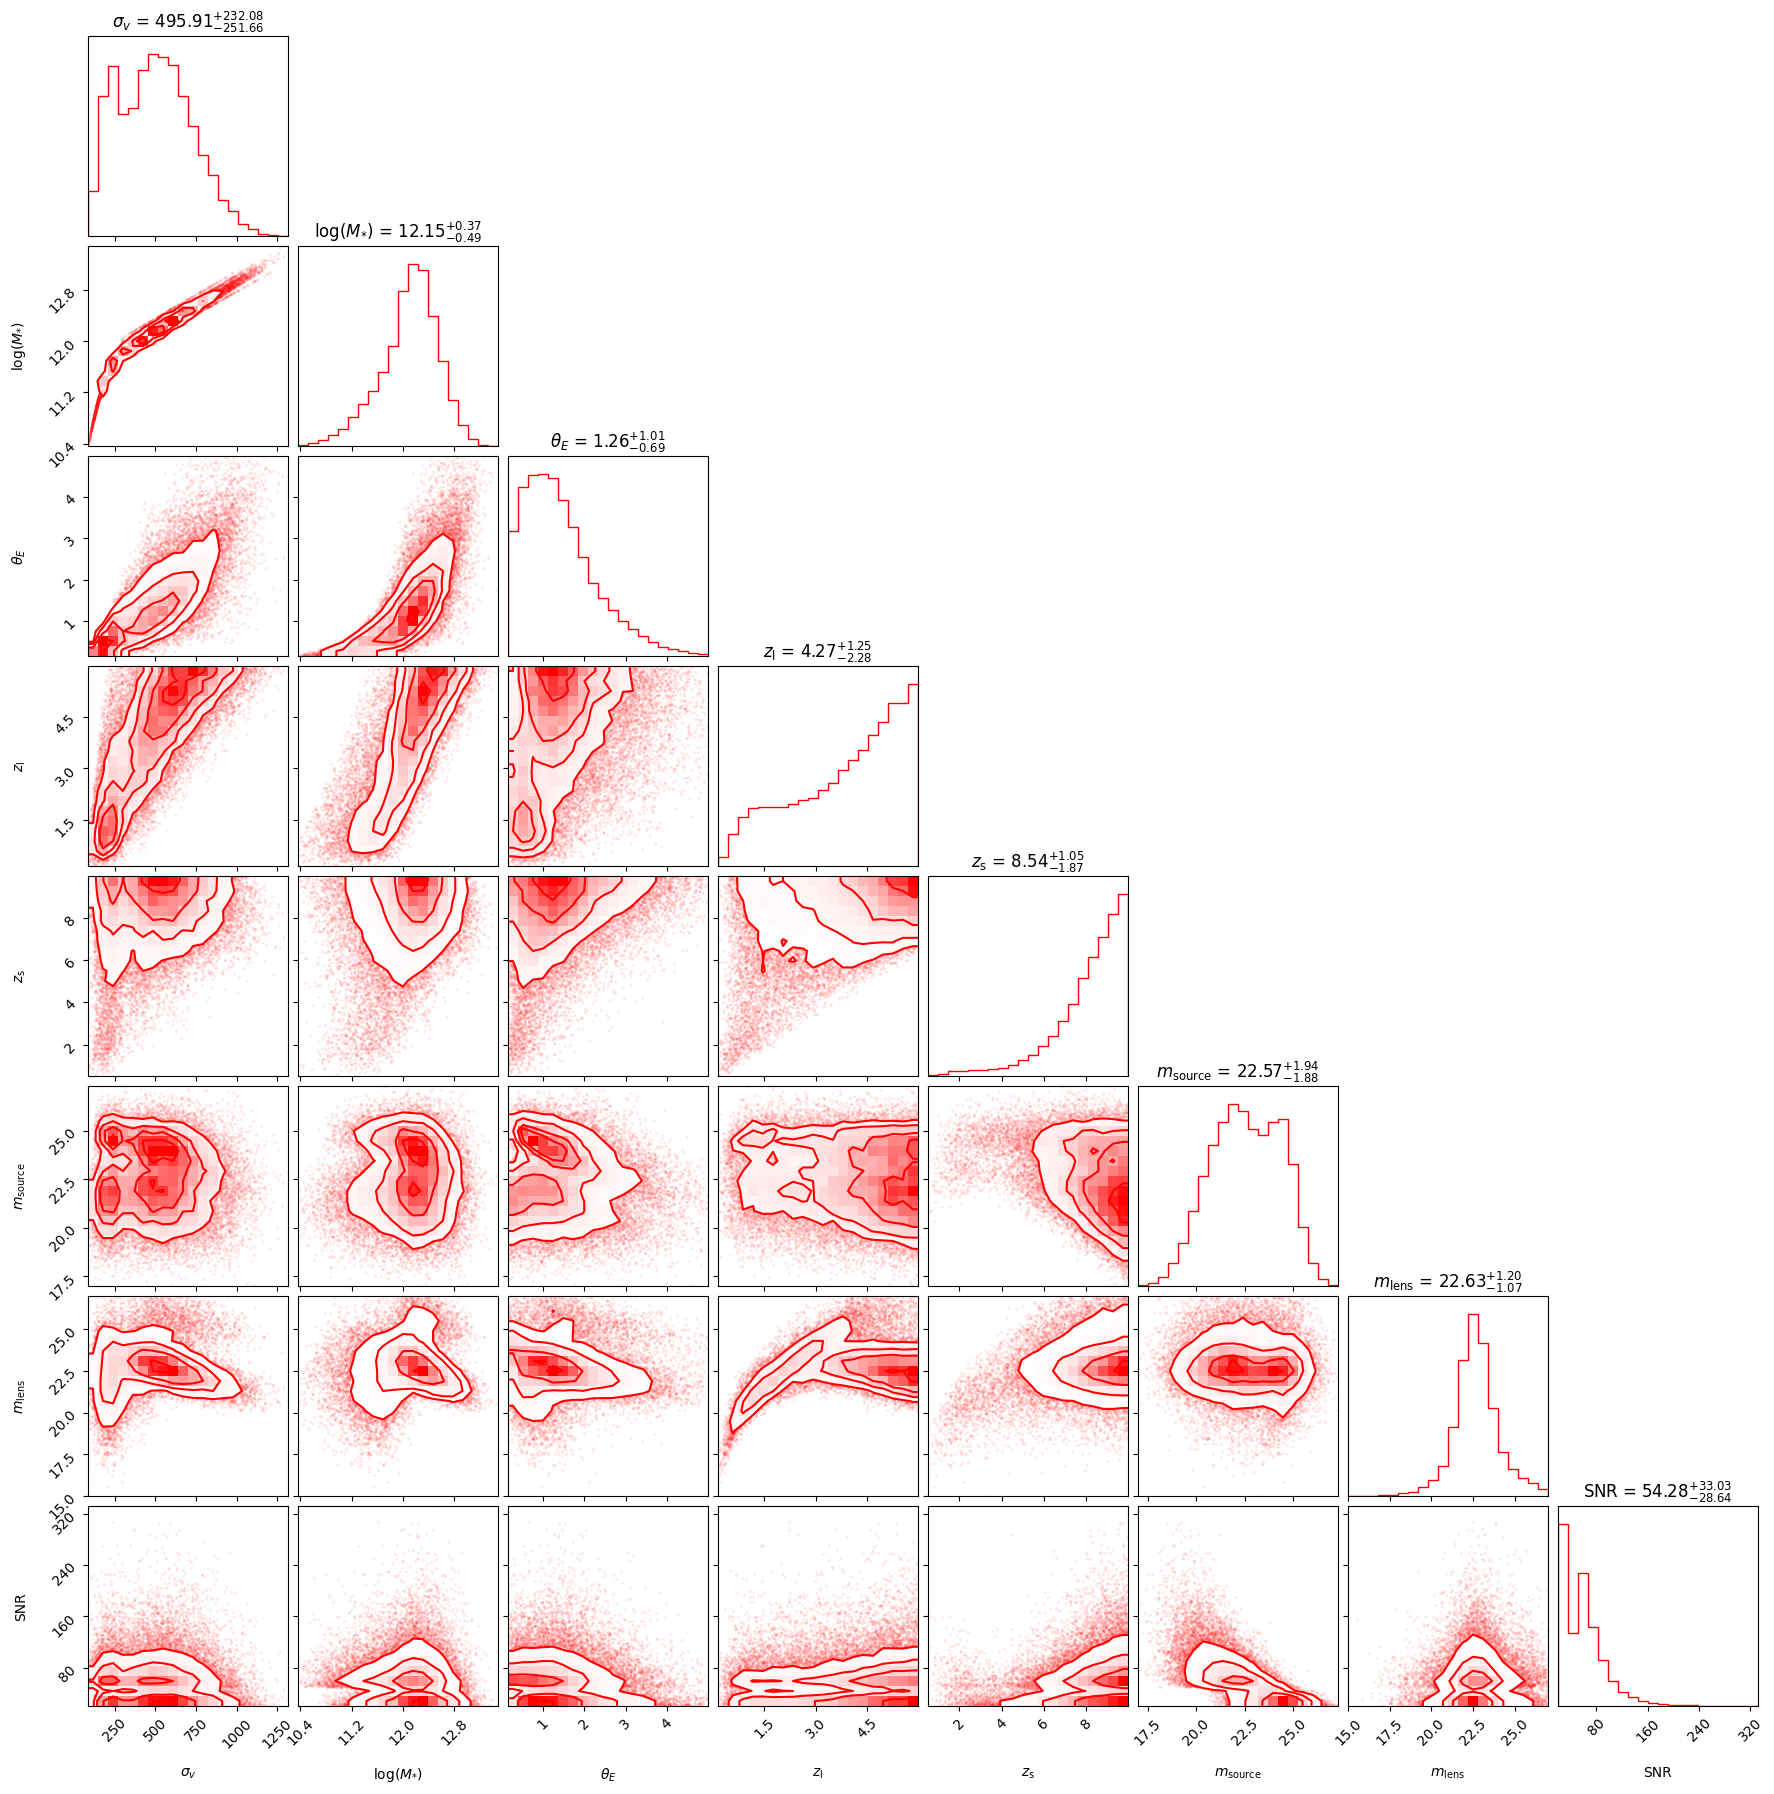

In [10]:
if total:
    corner(np.array(detectable_sample), color='red', labels=labels, show_titles=True, fig=total_corner, density=True, weights=weights(detectable_sample))
else:
    corner(np.array(detectable_sample), color='red', labels=labels, show_titles=True, density=True, weights=weights(detectable_sample))